# Minimal failing example for pure NN
The goal in this notebook is to reproduce the results on solution 4, of Sindre Blakseths paper about CoSTA, with a pure neural network.
I have not manage to get this to work, despite writing the whole code all over again. Can you see anything I have misunderstood / done wrong?
## Contents:
- Imports and configs
- Data preparation
- Model training
- Testing

## Imports and configs

In [28]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [29]:
### Configs

# Modelling
Ne = 20 # number of elements (spacial), so 21 
T = 5 # Max time
time_steps=5000 # Number of time steps
k = T/time_steps # time step length
tri = np.linspace(0,1,Ne+1) # Triangulation

# The exact solution, is solution 4 in Sindres thesis
alpha = 1 # I use only this alpha, for both trainig and testing.
#u_ex = lambda x,t=T: 1+np.sin(2*np.pi*t+alpha)*np.cos(2*np.pi*x)
#u_ex = lambda x,t=T: 2+alpha*(x-1)*np.tanh(x/(t+0.1))
u_ex = lambda x,t=T: t+alpha*x*x/2





# NN architecture - same as in Sindres thesis
hidden_layers = 4
hidden_layar_depth = 80
learning_rate = 1e-5
lrelu_slope = 0.01

## Data prep

In [30]:
### Make data set


pnn_data = np.zeros((time_steps, Ne+1 + Ne-1)) #Ne+1 for X, Ne-1 for Y

for t in range(time_steps):
    
    # we set the pnn_data as the exact temperature u_ex
    pnn_data[t, :Ne+1] = u_ex(x=tri, t=t*k) # input: exact solution
    pnn_data[t, Ne+1:] = u_ex(x=tri[1:-1], t=(t+1)*k) # outout: inner nodes, next step


np.random.shuffle(pnn_data) # Shuffle along 1st axis
X = pnn_data[:, :Ne+1]
Y = pnn_data[:, Ne+1:]

## Model initialisation and training

In [31]:
inputs = tf.keras.Input(shape=(Ne+1)) # Input layer
x = inputs
for h in range(hidden_layers):
    x = tf.keras.layers.Dense(hidden_layar_depth)(x) # Hidden layers
    x = tf.keras.layers.LeakyReLU(alpha=lrelu_slope)(x) # Activation fuction
x = tf.keras.layers.Dense(Ne-1)(x)
model = tf.keras.Model(inputs,x)
model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate))

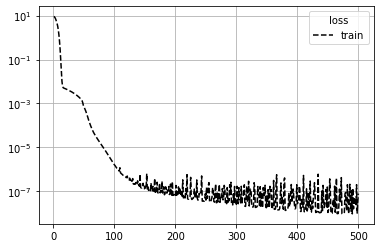

In [32]:
# train
pnn_hist = model.fit(x=X, y=Y, epochs=500, verbose=0, batch_size = 32)

# plot loss
epochs_vector = np.arange(1, len(pnn_hist.history['loss'])+1)
plt.plot(epochs_vector, pnn_hist.history['loss'], 'k--', label='train')
plt.yscale('log')
plt.grid()
plt.legend(title='loss')
plt.show()

## Testing

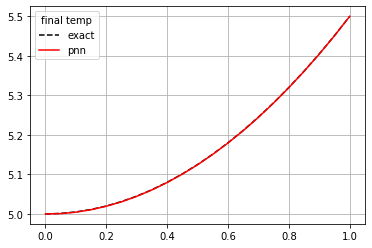

In [33]:
u = u_ex(x=tri, t=0) # initial input
for t in range(time_steps):
    u_prev = u # set u_prev (used as model input) as the previous step
    u_prev = np.array([u_prev]) # this format is needed for NN
    u = u_ex(t=(t+1)*k, x = tri) # set the next u (only boundary is kept, the rest is overwritten)
    u[1:-1] = model(u_prev)



plt.plot(tri,u_ex(t=T,x=tri), 'k--', label='exact')
plt.plot(tri,u, 'r', label='pnn')
plt.grid()
plt.legend(title=f'final temp')
plt.show()


In [34]:
(1-1/32)**142

0.011017006433420963